In [1]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-03-25,27487.337891,27791.826172,27196.234375,27494.707031,27494.707031,13383005987
2023-03-26,27495.523438,28178.144531,27445.046875,27994.330078,27994.330078,13878363192
2023-03-27,27994.068359,28037.925781,26606.689453,27139.888672,27139.888672,18188895178


In [27]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error


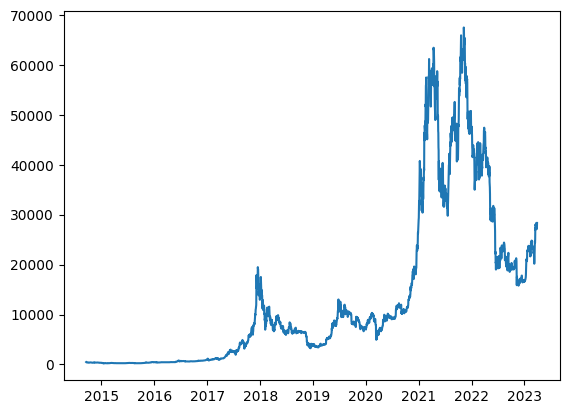

In [9]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [23]:
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

In [25]:
model_predictions = []
n_test_obs = len(testing_data)


In [39]:
for i in range(n_test_obs):
    model = sm.tsa.arima.ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = list(output) 
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [ ]:
print(model_fit.summary())